## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_com = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
mouse_com.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
tot_mice = mouse_com['Mouse ID'].nunique()
tot_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupli_mice = mouse_com.loc[mouse_com.duplicated(subset=['Mouse ID','Timepoint',]),'Mouse ID'].unique()
pd.DataFrame(dupli_mice)

,0
0,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
update_mouse = mouse_com[mouse_com['Mouse ID'] != 'g989']
update_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
update_mice_count = update_mouse['Mouse ID'].nunique()
update_mice_count


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped_drug = update_mouse.groupby('Drug Regimen')
tumor_mean = grouped_drug['Tumor Volume (mm3)'].mean()
tumor_med = grouped_drug['Tumor Volume (mm3)'].median()
tumor_var = grouped_drug['Tumor Volume (mm3)'].var()
tumor_sd = grouped_drug['Tumor Volume (mm3)'].std()
tumor_sem = grouped_drug['Tumor Volume (mm3)'].sem()
# Using the aggregation method, produce the same summary statistics in a single line
drug_sum = {"Tumor Vol Mean": tumor_mean,"Tumor Vol Median": tumor_med,"Tumor Vol Variance": tumor_var,
           "Tumor Vol Standard Deviation": tumor_sd, "Tumor Vol SEM": tumor_sem}
drug_summary = pd.DataFrame(drug_sum)
drug_summary

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Standard Deviation,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Bar Chart: Number of Mice in Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Number of Mice'>

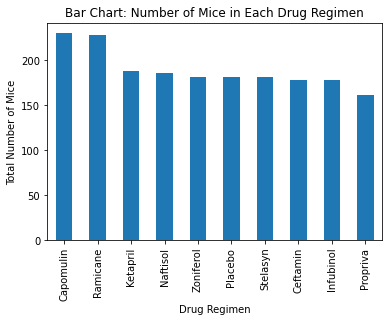

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
grouped_drug.head(10)
drug_bar = mouse_com['Drug Regimen'].value_counts()
drug_bar.plot(kind = 'bar', xlabel = "Drug Regimen", ylabel = "Total Number of Mice", title = "Bar Chart: Number of Mice in Each Drug Regimen")

(-0.75, 9.75)

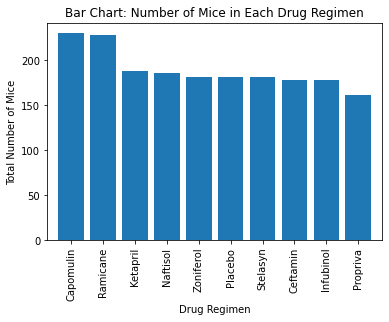

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_bar))
plt.bar(x_axis,drug_bar)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.title("Bar Chart: Number of Mice in Each Drug Regimen")
ticks_name = [val for val in x_axis]
plt.xticks(ticks_name, drug_bar.index.values, rotation = "vertical")
plt.xlim(-0.75,len(x_axis)-0.25)


<AxesSubplot:title={'center':'Female vs. Male Mice'}>

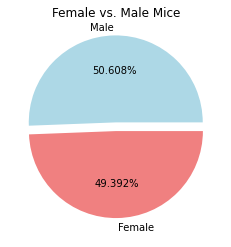

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = mouse_com['Sex'].value_counts()
sex.plot(kind = 'pie', title = "Female vs. Male Mice",explode = (0.1,0), colors = ("lightblue","lightcoral"),autopct = "%1.3f%%",ylabel = "")


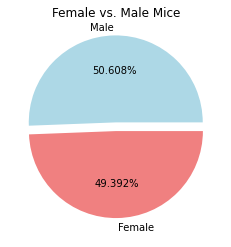

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
colors = ['lightblue','lightcoral']
explode = (0.1 , 0)
plt.pie(sex, labels=labels, colors=colors, explode = explode, autopct = "%1.3f%%")
plt.title("Female vs. Male Mice")
#plt.ylabel = "Sex"
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = mouse_com.loc[mouse_com['Drug Regimen']=='Capomulin', :]
capomulin_w914 = capomulin.loc[capomulin['Mouse ID']== 'w914', : ]
capomulin_w914


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
215,w914,Capomulin,Male,24,21,0,45.000000,0
216,w914,Capomulin,Male,24,21,5,45.893720,0
217,w914,Capomulin,Male,24,21,10,43.231963,0
218,w914,Capomulin,Male,24,21,15,43.688449,0
219,w914,Capomulin,Male,24,21,20,41.108092,0
220,w914,Capomulin,Male,24,21,25,40.291917,0
221,w914,Capomulin,Male,24,21,30,40.993110,0
222,w914,Capomulin,Male,24,21,35,41.664916,1
223,w914,Capomulin,Male,24,21,40,35.611309,2
224,w914,Capomulin,Male,24,21,45,36.041047,2


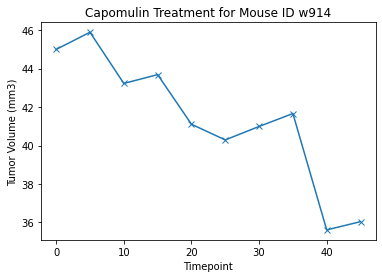

In [19]:
plt.plot(capomulin_w914['Timepoint'],capomulin_w914['Tumor Volume (mm3)'],marker = 'x')
plt.title("Capomulin Treatment for Mouse ID w914")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
